Kullanacağımız veri setlerini içe aktaralım.

In [1]:
import pandas as pd

airlines_final = pd.read_csv("airlines_final.csv")
categories = pd.read_csv("categories.csv")

Kod bloklarından elde edilen çıktıları birbirinden ayırmak için ayrac() isimli bir fonksiyon oluşturalım.

In [2]:
def ayrac():
    print("\n*****\n")

DataFramelerine bir göz atalım.

In [3]:
print(airlines_final.head(3))
ayrac()
print(categories)

   Unnamed: 0    id       day      airline        destination    dest_region  \
0           0  1351   Tuesday  UNITED INTL             KANSAI           Asia   
1           1   373    Friday       ALASKA  SAN JOSE DEL CABO  Canada/Mexico   
2           2  2820  Thursday        DELTA        LOS ANGELES        West US   

  dest_size boarding_area   dept_time  wait_min cleanliness         safety  \
0       Hub  Gates 91-102  31/12/2018       115       Clean        Neutral   
1     Small   Gates 50-59  31/12/2018       135       Clean      Very safe   
2       Hub   Gates 40-48  31/12/2018        70     Average  Somewhat safe   

     satisfaction  
0  Very satisfied  
1  Very satisfied  
2         Neutral  

*****

      cleanliness           safety           satifaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsat

# TEXT AND CATEGORICAL DATA PROBLEMS (Metin ve Kategorik Veri Problemleri)

Bu bölümde aşağıdaki konulara odaklanacağız:

+ Whitespace and capitalization inconsistencies in category labels (Kategori etiketlerindeki boşluk ve büyük harf tutarsızlıkları)

+ Collapse multiple categories into one (Birden fazla kategoriyi tek bir kategoriye daraltma)

+ Reformat strings for consistency (Tutarlılık için dizeleri yeniden biçimlendirme)

## Membership Constraints (Üyelik Kısıtlamaları)

Bu bölümde kullandığımız işlevler ve tutorial linkleri : 

+ pandas.unique() = https://pandas.pydata.org/docs/reference/api/pandas.unique.html 

+ pandas.DataFrame.isin() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html

+ difference() = https://www.programiz.com/python-programming/methods/set/difference

Kategorik verilerde, kategori değerlerinin içerisinde alakasız bir kategori değeri bulunabilir. Şunun gibi bir durumda : 

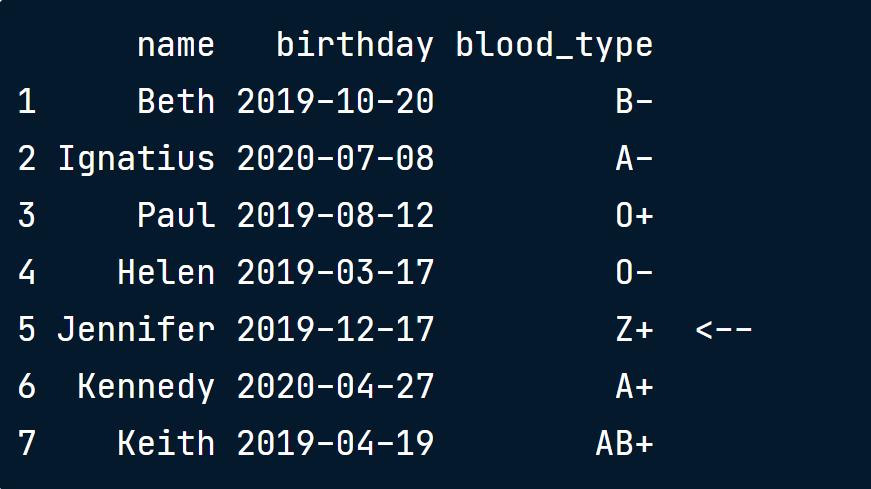

Z+ kan değeri diğer kategorik değerlerden alakasızdır. Bu gibi durumlarla ilgilenmek için birçok yol vardır. Biz, bu verileri bırakma ile ilgileneceğiz.

airlines_final veri seti üzerinde categories veri setinden yardım alarak, alakasız olan kategorik değeri bulalım ve o değerin olduğu satırı bırakılım. İşlemlere başlamadan önce bu iki veri seti hakkında bilgi edinelim.

In [4]:
print(airlines_final.head(3))
ayrac()
print(categories)

   Unnamed: 0    id       day      airline        destination    dest_region  \
0           0  1351   Tuesday  UNITED INTL             KANSAI           Asia   
1           1   373    Friday       ALASKA  SAN JOSE DEL CABO  Canada/Mexico   
2           2  2820  Thursday        DELTA        LOS ANGELES        West US   

  dest_size boarding_area   dept_time  wait_min cleanliness         safety  \
0       Hub  Gates 91-102  31/12/2018       115       Clean        Neutral   
1     Small   Gates 50-59  31/12/2018       135       Clean      Very safe   
2       Hub   Gates 40-48  31/12/2018        70     Average  Somewhat safe   

     satisfaction  
0  Very satisfied  
1  Very satisfied  
2         Neutral  

*****

      cleanliness           safety           satifaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsat

**xx.unique()** işlevini kullanarak airlines_final veri setindeki anket sütunlarının (Cleanliness, Safety, Satisfaction) eşsiz değerlerini yazdıralım. 

In [5]:
print("Cleanliness :", airlines_final["cleanliness"].unique())
ayrac()
print("Safety :", airlines_final["safety"].unique())
ayrac()
print("Satisfaction :", airlines_final["satisfaction"].unique())

Cleanliness : ['Clean' 'Average' 'Unacceptable' 'Somewhat clean' 'Somewhat dirty'
 'Dirty']

*****

Safety : ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe']

*****

Satisfaction : ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied']


+ Çıktılara dikkat edecek olursak, **cleanliness** sütununda **"Unacceptable"** kategorik değeri alakasızdır.

category_airlines adlı bir değişkene, **difference()** işlevi ile **cleanliness** sütunundaki alakasız kategorik değeri bularak **set()** işlevi ile set veri yapısı halinde bulduğumuz alakasız değişkenleri atayalım. Ardından category_clean_rows adlı başka bir değişkene **xx.isin()** işlevini kullanarak alakasız olan kategorik değerine sahip olan satırları bulalım ve yazdıralım.

In [6]:
#1
category_clean = set(airlines_final["cleanliness"]).difference(categories["cleanliness"])
print(category_clean)
ayrac()

#2
category_clean_rows = airlines_final["cleanliness"].isin(category_clean)
print(category_clean_rows)
ayrac()

#3
print(airlines_final[category_clean_rows])
ayrac()

#4
print(airlines_final[~category_clean_rows])

{'Unacceptable'}

*****

0       False
1       False
2       False
3       False
4        True
        ...  
2472    False
2473    False
2474    False
2475    False
2476    False
Name: cleanliness, Length: 2477, dtype: bool

*****

    Unnamed: 0    id        day           airline  destination  dest_region  \
4            4  2992  Wednesday          AMERICAN        MIAMI      East US   
17          18  2913     Friday  TURKISH AIRLINES     ISTANBUL  Middle East   
89         100  2321  Wednesday         SOUTHWEST  LOS ANGELES      West US   

   dest_size boarding_area   dept_time  wait_min   cleanliness         safety  \
4        Hub   Gates 50-59  31/12/2018       559  Unacceptable      Very safe   
17       Hub  Gates 91-102  31/12/2018       225  Unacceptable      Very safe   
89       Hub   Gates 20-39  31/12/2018       130  Unacceptable  Somewhat safe   

          satisfaction  
4   Somewhat satsified  
17  Somewhat satsified  
89  Somewhat satsified  

*****

      Unnamed: 0  

+ 1-) **.difference(categories["cleanliness"])** kısmı categories veri setinin, **cleanliness** sütunu ile karşılaştırma yapar.

+ 2-) **.isin(category_clean)** kısmı cleanliness sütununda, category_clean olan değerleri True olarak yazdırır.

+ 3-) airlines_final veri setindeki alakasız kategorik değerlerin olduğu satırları döndürür.

+ 4-) airlines_final veri setindeki alakasız kategorik değerlerin olduğu satırların kaldırılmış halini döndürür. Bunu **' ~ '** operatörü sağlar.

## Categorical Variables (Kategorik Değişkenler) 

Bu bölümde kullandığımız işlevler ve tutorial linkler : 

+ pandas.qcut = https://pandas.pydata.org/docs/reference/api/pandas.qcut.html

+ pandas.cut = https://pandas.pydata.org/docs/reference/api/pandas.cut.html

+ numpy.inf = https://numpy.org/devdocs/reference/constants.html#numpy.inf

+ replace() = https://www.programiz.com/python-programming/methods/string/replace

Kategorik verileri temizlerken karşılaşabileceğimiz diğer problemler arasında şunlar vardır: 

+ Value inconsistency (Değer tutarsızlığı)

    + Inconsistent fields (Tutarsız alanlar) = 'married', 'Maried', 'UNMARRIED', 'not married'
    
    + White spaces (Beyaz boşluklar) = 'married ', ' married '


+ Collapsing too many categories to few (Çok fazla kategoriyi birkaç kategoriye daraltmak) = Tek bir kategori olabilecekken çok fazla kategorinin olması durumu


+ Making sure data is of type (Verilerin doğru türde olduğundan emin olunması)

### < Value Inconsistency (Değer Tutarsızlığı) >

Veri girişlerinde, aynı anlamı işaret eden ancak farklı şekilde yazılmış verilerin olması tutarsızlığa yol açar ve verilerimizi analiz ederken yanıltıcı sonuçlar elde etmemize neden olur. 

Örneğin evlilik durumu gibi bir sütunumuz olsun ve bu sütundaki veriler, kategorik veriler olsun. Kategoriler ise evli (married) ve evli değil (unmarried) olsun. Bu veri girişleri; 'married', 'Married', 'UNMARRIED', 'unmarried' şekillerinde farklı farklı olursa yanlış yazımlar analize dahil edilmez ve sonuçlar yanıltıcı olur. 

Bu durumla başa çıkmak için : 

+ **str.upper()** kullanarak bütun sütundaki metinleri büyük harfle ya da **str.lower()** kullanarak bütun sütundaki metinleri küçük harfle yazdırabiliriz.


Bir başka sorun ise white spaces (beyaz boşluklar) adını verdiğimiz, veri girişi yapılırken metnin başında ya da sonunda boşluklar bırakılmasıdır. Bu durum da aynı şekilde analiz yaparken tutarsızlığa yol açar. Bununla başa çıkmak için: 

+ **str.strip()** kullanarak boşlukları yok edebiliriz.

airlines_final veri setindeki, **dest_region** ve **dest_size** sütunlarındaki değer tutarsızlıklarını çözelim. Ancak başlamadan önce bu iki sütuna bir göz atalım. Ardından bu sütunlardaki eşsiz değerleri **xx.unique()** işlevi ile döndürelim.

In [7]:
print(airlines_final["dest_region"].head(3))
ayrac()
print(airlines_final["dest_size"].head(3))

ayrac()

print(airlines_final["dest_region"].unique())
ayrac()
print(airlines_final["dest_size"].unique())

0             Asia
1    Canada/Mexico
2          West US
Name: dest_region, dtype: object

*****

0      Hub
1    Small
2      Hub
Name: dest_size, dtype: object

*****

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']

*****

['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


+ **dest_region** sütununda değer tutarsızlığı sorunu var, **dest_size** sütununda beyaz boşluk sorunu var. Eğer bunları değiştirmezsek aynı anlama gelen ancak yanlış yazıldığı için farklı bir kategorik değer olarak algılanan bu veriler, analiz sonucunda hatalara yol açar.

**dest_region** sütunundaki bütün metinleri **str.lower()** ile küçük yazdıralım ve **'eur'** olan kategorik değeri **replace()** kullanarak **'europe'** ile değiştirelim. Ardından **dest_region** sütunundaki **'europe'** olan değerlerin kaç tane olduğunu görebilmek için **shape** işlevini kullanalım. 

In [8]:
airlines_final["dest_region"] = airlines_final["dest_region"].str.lower()
airlines_final["dest_region"] = airlines_final["dest_region"].replace({"eur" : "europe"})

print("dest_region = europe olan satıların olduğu tablonun, satır sütun sayısı =",airlines_final[airlines_final["dest_region"] == "europe"].shape)

dest_region = europe olan satıların olduğu tablonun, satır sütun sayısı = (351, 13)


**dest_size** sütunundaki beyaz boşlukları kaldırmak için **str.strip()** işlevini kullanalım. Son olarak her iki sütunundaki eşsiz değerleri döndürelim ve tutarsızlık ve boşluk sorunları ortadan kalmış mı görelim.

In [9]:
airlines_final['dest_size'] = airlines_final['dest_size'].str.strip()

print(airlines_final["dest_region"].unique())
print(airlines_final["dest_size"].unique())

ayrac()

print(airlines_final["dest_region"].value_counts())
ayrac()
print(airlines_final["dest_size"].value_counts())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']

*****

west us                  864
east us                  436
europe                   351
midwest us               251
asia                     226
canada/mexico            198
middle east               69
australia/new zealand     60
central/south america     22
Name: dest_region, dtype: int64

*****

Hub       1550
Medium     600
Small      200
Large      127
Name: dest_size, dtype: int64


### < Collapsing Data Into Categories (Verileri Kategorilere Daraltmak) >

Bazen elimizdeki kategorilerin dışında, başka kategoriler oluşturmak isteyebilir ya da kategorilerin miktarını azaltmak isteyebiliriz. 

airlines_final veri setindeki **wait_min** sütunundaki bekleme sürelerini **wait_type** adlı yeni bir sütunda **'0-60' arası 'short'**, **'60-180' arası 'medium'** ve **'180+' olanları 'long'** olarak adlandıracak şekilde yeni bir kategori üretelim. Önce bu yeni kategoriyi üretebilmek için sayıların olduğu aralıkları ve bunların nasıl adlandırılacağını içeren değişkenleri oluşturmamız lazım.

In [10]:
import numpy as np

#1
label_ranges = [0, 60, 180, np.inf]
label_names = ["short", "medium", "long"]

#2
airlines_final["wait_type"] = pd.cut(airlines_final["wait_min"], bins = label_ranges,
                                    labels = label_names)

print(airlines_final[["wait_min", "wait_type"]])

      wait_min wait_type
0          115    medium
1          135    medium
2           70    medium
3          190      long
4          559      long
...        ...       ...
2472       280      long
2473       165    medium
2474        92    medium
2475        95    medium
2476       220      long

[2477 rows x 2 columns]


+ 1-) Yeni kategorimiz **wait_type** için aralıkları oluşturduk. 
+ 2-) bins = Bölme ölçütü, labels = Ölçütlerin İsimleri

airlines_final veri setindeki **day** sütunundaki günleri hafta içi ve hafta sonu olarak ikiye ayaran bir kategori oluşturalım. Burada aslında kategori azalması yapmış oluyoruz. Her bir günün ayrı ayrı kategorik değer olması yerine, hafta içi ve hafta sonu olarak 2 tane kategorimiz oluyor.

In [11]:
mappings = {"Monday" : "weekday", "Tuesday" : "weekday", "Wednesday" : "weekday",
           "Thursay" : "weekday", "Friday" : "weekday", "Saturday" : "weekend", "Sunday" : "weekend"}

airlines_final["day_week"] = airlines_final["day"].replace(mappings)
print(airlines_final[["day", "day_week"]])

            day  day_week
0       Tuesday   weekday
1        Friday   weekday
2      Thursday  Thursday
3       Tuesday   weekday
4     Wednesday   weekday
...         ...       ...
2472    Tuesday   weekday
2473   Thursday  Thursday
2474     Friday   weekday
2475    Tuesday   weekday
2476   Saturday   weekend

[2477 rows x 2 columns]
